## Pre-processing des data

1) Data cleaning

a) FBREF

In [2]:
import numpy as np
import pandas as pd
import pickle
import zlib
import seaborn as sns

In [3]:
glossary = pd.read_csv("fbref_data\\Glossaire_FBREF.csv")
glossary.head()

,Unnamed: 0,0
0,Season,Season
1,Age,Age at season start
2,Country,Flag and name of the country.
3,Comp,Competition
4,LgRank,Squad finish in competition


In [4]:
glossary.describe()

glossary.rename(columns={"Unnamed: 0" : "Name", "0" : "Description"}, inplace = True)
glossary.head()

,Name,Description
0,Season,Season
1,Age,Age at season start
2,Country,Flag and name of the country.
3,Comp,Competition
4,LgRank,Squad finish in competition


In [5]:
player_stats_fbref=pickle.loads(zlib.decompress(open('fbref_data/compressed_player_stats_fbref_1.bin','rb').read()))
player_stats_fbref.update(pickle.loads(zlib.decompress(open('fbref_data/compressed_player_stats_fbref_2.bin','rb').read())))
player_stats_fbref=pd.DataFrame(player_stats_fbref).transpose()
player_stats_fbref=player_stats_fbref.sort_index(axis=1,ascending=False)

teams_fbref=pickle.load(open('fbref_data/teams_fbref.pkl','rb'))



On dirait que la colonne meta contienne juste des ingos banales sur le joueur ajd exactement

In [144]:
player_stats_fbref['2024-2025']["Yoel Lago"]

{'age': 20.0,
 'team': 'Celta Vigo',
 'country': 'es ESP',
 'comp_level': '1. La Liga',
 'lg_finish': '10th',
 'games': 0.0,
 'minutes': '',
 'minutes_per_game': '',
 'minutes_pct': '',
 'minutes_90s': '',
 'games_starts': 0.0,
 'minutes_per_start': '',
 'games_complete': 0.0,
 'games_subs': 0.0,
 'minutes_per_sub': '',
 'unused_subs': 1.0,
 'points_per_game': '',
 'on_goals_for': '',
 'on_goals_against': '',
 'plus_minus': '',
 'plus_minus_per90': '',
 'plus_minus_wowy': '',
 'on_xg_for': '',
 'on_xg_against': '',
 'xg_plus_minus': '',
 'xg_plus_minus_per90': '',
 'xg_plus_minus_wowy': ''}

On met toutes les données qu'on a sous forme de tableaux pour chaque saison complète (une saison complète = une de la forme "year_n-year_(n+1)")

In [145]:
complete_seasons = [column for column in player_stats_fbref.columns if "-" in str(column)]
# interesting_seasons =[season for season in complete_seasons if player_stats_fbref[season].count() > 1000]
interesting_seasons = ["2024-2025"]
dico_datas = {}

for i in range (len(interesting_seasons)):

    season = interesting_seasons[i]
    season_number = 25 - i
    for player in player_stats_fbref.index :
        if type(player_stats_fbref[season].loc[player]) == dict :
            if len(player_stats_fbref[season].loc[player].keys()) == 147 :
                dico_season = {key : [] for key in player_stats_fbref['2024-2025'][player].keys()} #c'est à cet endroit qu'on trouve le plus de stats donc j'en fais ma référence
        
    for player in player_stats_fbref[season].index :
        for key in dico_season.keys():
            player_info = player_stats_fbref[season][player]
            if type(player_info) == dict :
                if key in player_info.keys():

                    dico_season[key].append(player_info[key])

                else :
                    dico_season[key].append(None)
            else : 
                dico_season[key].append(None)


    dico_datas[season] = pd.DataFrame(dico_season, index = player_stats_fbref.index)

        


In [146]:
dico_datas['2024-2025']['minutes'].loc["Yoel Lago"] == ''

True

In [147]:
# dico_datas['2024-2025'].info()
data = dico_datas['2024-2025']
print(data.columns)
data[data['team'] == 'Manchester City']['on_goals_for']
player_stats_fbref['2024-2025'].loc['Rico Lewis']

Index(['age', 'team', 'country', 'comp_level', 'lg_finish', 'minutes_90s',
       'goals', 'shots', 'shots_on_target', 'shots_on_target_pct',
       ...
       'fouls', 'fouled', 'offsides', 'pens_won', 'pens_conceded', 'own_goals',
       'ball_recoveries', 'aerials_won', 'aerials_lost', 'aerials_won_pct'],
      dtype='object', length=147)


{'age': 19.0,
 'team': 'Manchester City',
 'country': 'eng ENG',
 'comp_level': '1. Premier League',
 'lg_finish': '4th',
 'minutes_90s': 11.4,
 'goals': 1.0,
 'shots': 7.0,
 'shots_on_target': 1.0,
 'shots_on_target_pct': 14.3,
 'shots_per90': 0.62,
 'shots_on_target_per90': 0.09,
 'goals_per_shot': 0.14,
 'goals_per_shot_on_target': 1.0,
 'average_shot_distance': 15.9,
 'shots_free_kicks': 0.0,
 'pens_made': 0.0,
 'pens_att': 0.0,
 'xg': 1.1,
 'npxg': 1.1,
 'npxg_per_shot': 0.15,
 'xg_net': -0.1,
 'npxg_net': -0.1,
 'passes_completed': 551.0,
 'passes': 604.0,
 'passes_pct': 91.2,
 'passes_total_distance': 7714.0,
 'passes_progressive_distance': 1324.0,
 'passes_completed_short': 343.0,
 'passes_short': 367.0,
 'passes_pct_short': 93.5,
 'passes_completed_medium': 183.0,
 'passes_medium': 195.0,
 'passes_pct_medium': 93.8,
 'passes_completed_long': 15.0,
 'passes_long': 19.0,
 'passes_pct_long': 78.9,
 'assists': 2.0,
 'xg_assist': 0.3,
 'pass_xa': 0.6,
 'xg_assist_net': 1.7,
 'assis

In [148]:
data['minutes_90s'] = dico_datas['2024-2025']['minutes_90s'].apply(lambda x: float(x) if type(x)==str and x!="" else x)
data['minutes_90s']

César Fernández    None
Yoel Lago              
Marc Vidal             
Rui Silva          15.0
Abde Ezzalzouli    12.6
                   ... 
Mihailo Ristić      1.3
Fer López           0.5
Franco Cervi        0.1
Joseph Aidoo        0.0
Tadeo Allende       0.0
Name: minutes_90s, Length: 10436, dtype: object

<Axes: xlabel='minutes', ylabel='Count'>

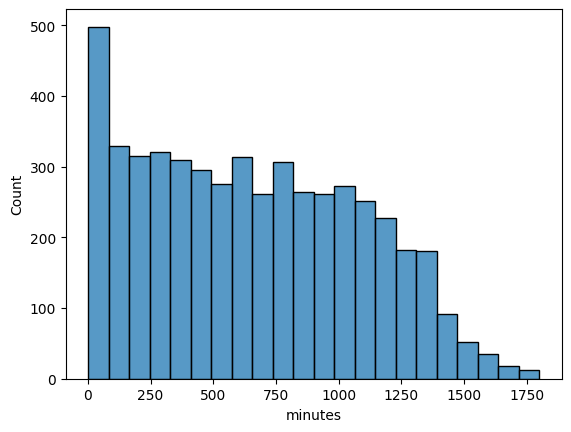

In [149]:
# Histogramme des minutes jouées dans la saison 24-25 par les joueurs
def convert_str_to_float (string) :
    if type(string) == str :
        if "," in string :
            chain = string.split(",")
            nb = float(chain[0])*1000 + float(chain[1])
            return nb
        if string == "":
            return None
        else :
            return float(string)
    return string
convert_str_to_float("1,350")
data['minutes'] = dico_datas['2024-2025']['minutes'].apply(lambda x : convert_str_to_float(x))
data['minutes']

sns.histplot(data = data, x='minutes')

In [164]:
data['shots']

César Fernández     NaN
Yoel Lago           NaN
Marc Vidal          NaN
Rui Silva           NaN
Abde Ezzalzouli    38.0
                   ... 
Mihailo Ristić      0.0
Fer López           1.0
Franco Cervi        0.0
Joseph Aidoo        0.0
Tadeo Allende       0.0
Name: shots, Length: 10436, dtype: float64

<Axes: xlabel='goals', ylabel='Count'>

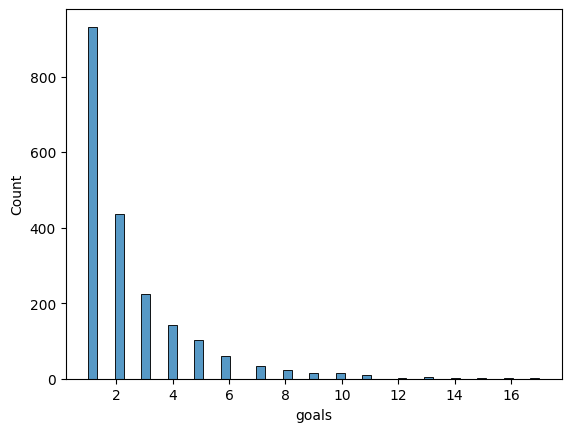

In [169]:
data['goals'] = data['goals'].apply(convert_str_to_float)
data['shots'] = data['shots'].apply(convert_str_to_float)
data['xg'] = data['xg'].apply(convert_str_to_float)
sns.histplot(data=data[data['goals'] > 0], x='goals')

In [193]:
data.describe()

,goals,shots,pens_made,pens_att,xg,assists,games,minutes,games_starts,games_complete,games_subs,unused_subs,cards_yellow,cards_red,cards_yellow_red,own_goals
count,4565.000000,4236.000000,4565.000000,4565.000000,3442.000000,4815.000000,5457.000000,5075.000000,5457.000000,5457.000000,5457.000000,5457.000000,5123.000000,5123.000000,5123.000000,5123.000000
mean,1.063965,9.352219,0.104491,0.134283,1.021325,0.649429,9.369251,652.801576,6.793293,3.984973,2.575957,2.396005,1.476479,0.063049,0.028109,0.025766
std,1.836152,9.914040,0.454589,0.521804,1.511275,1.099745,5.200682,431.107227,5.299097,4.689766,2.788907,3.395789,1.502043,0.249418,0.166476,0.160898
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.100000,0.000000,5.000000,272.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,6.000000,0.000000,0.000000,0.500000,0.000000,10.000000,626.000000,6.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,13.000000,0.000000,0.000000,1.200000,1.000000,14.000000,995.500000,11.000000,7.000000,4.000000,3.000000,2.000000,0.000000,0.000000,0.000000
max,17.000000,75.000000,7.000000,7.000000,15.000000,10.000000,21.000000,1800.000000,20.000000,20.000000,16.000000,20.000000,9.000000,2.000000,2.000000,2.000000


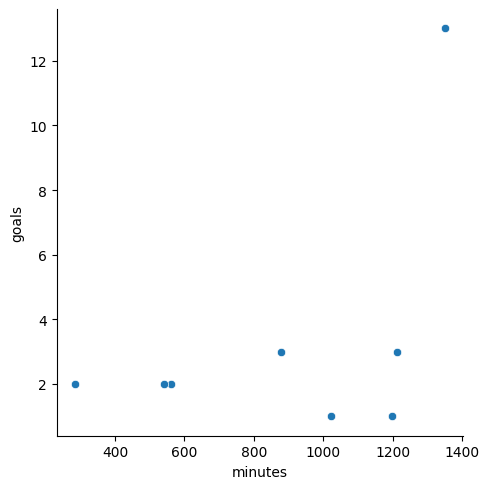

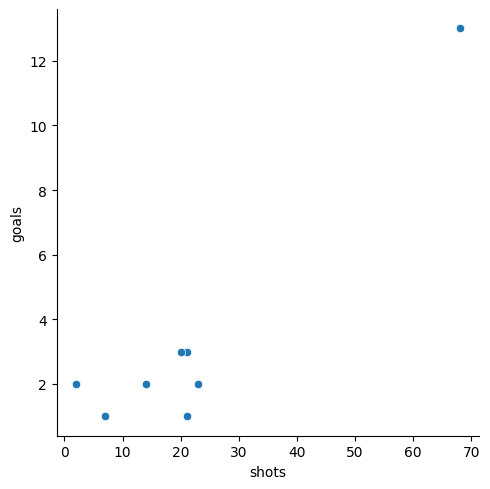

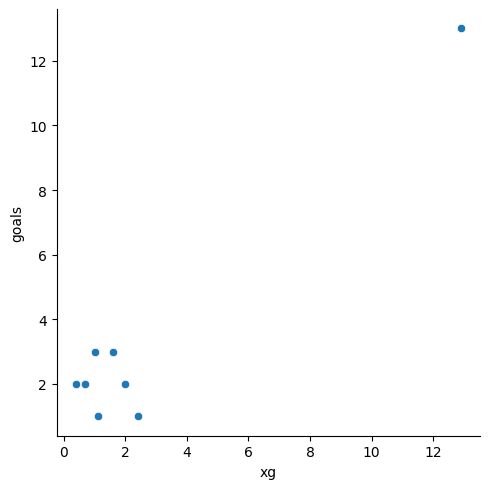

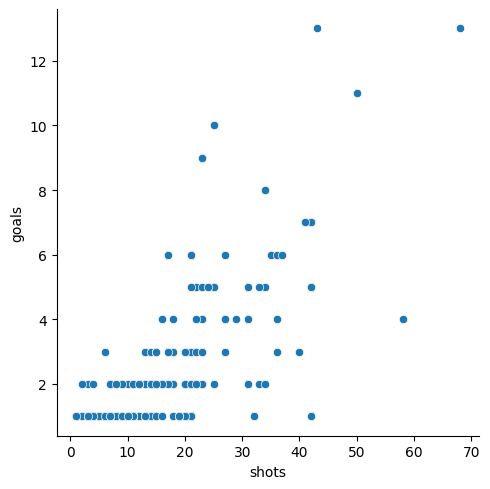

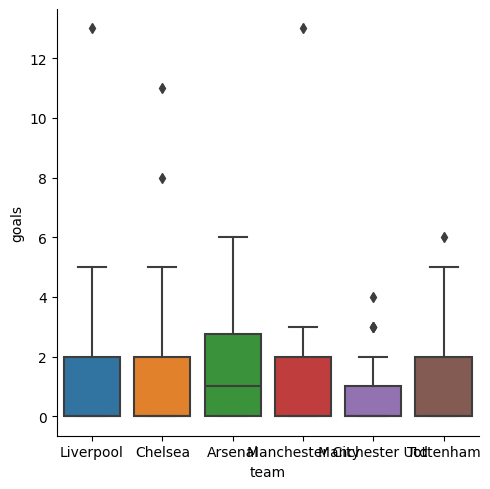

In [190]:
data_city = data[ data['team'] == 'Manchester City']
sns.relplot(data = data_city[data_city['goals'] > 0 ], x='minutes', y='goals')
sns.relplot(data = data_city[data_city['goals'] > 0 ], x='shots', y='goals')
sns.relplot(data = data_city[data_city['goals'] > 0 ], x='xg', y='goals')
pl_teams = ['Liverpool',
       'Chelsea', 'Arsenal', 'Fulham', 'Bournemouth', 'Crystal Palace',
       'Southampton', 'Manchester City', "Nott'ham Forest", 'Aston Villa',
       'Brighton', 'Brentford', 'Tottenham', 'Newcastle Utd',
       'Manchester Utd', 'West Ham', 'Everton', 'Leicester City',
       'Wolves', 'Ipswich Town']
data_pl = pd.concat([data[data['team'] == team] for team in pl_teams])
top6_pl_teams = ['Liverpool',
       'Chelsea', 'Arsenal','Manchester City','Manchester Utd','Tottenham']
data_pl_top_6 = pd.concat([data_pl[data_pl['team'] == team] for team in top6_pl_teams])
sns.relplot(data=data_pl[data_pl['goals']>0], x="shots", y="goals")
sns.catplot(data=data_pl_top_6, x='team', y='goals', kind="box")

In [ ]:
data_city['']

In [ ]:
# Retirer les lignes joueurs avec que des données manquantes, i.e joueurs ne jouant pas encore au foot cette saison là (complexité aberrante - à revoir)
for player in player_stats_fbref.index :
    for i in range ( len(dico_datas.keys()) ) :
        
        season = list(dico_datas.keys())[i]
        n=len(dico_datas[season].columns)

        compteur_nan = 0
        for column in dico_datas[season].columns :
            if str(dico_datas[season][column].loc[player]) in ["", 'None', "nan", "NaN"]:
                compteur_nan += 1
        
        if compteur_nan == n : 
            dico_datas[season] = dico_datas[season].drop(player, axis = 0)

In [7]:
player_stats_fbref[20:].describe()

,meta,2024-2025,2024,2023-2024,2023,2022-2023,2022,2021-2022,2021,2020-2021,...,1999-2000,1999,1998-1999,1998,1997-1998,1996-1997,1995-1996,1994-1995,1993-1994,1992-1993
count,10416,5438,533,6183,526,6458,520,6576,488,6444,...,36,1,27,1,16,7,4,4,1,1
unique,8545,5435,533,6181,526,6452,520,6565,488,6432,...,36,1,27,1,16,7,4,4,1,1
top,"{'height': '', 'weight': '', 'preferred foot':...","{'age': 20.0, 'team': 'Saint-Étienne', 'countr...","{'age': 25.0, 'team': 'Godoy Cruz', 'country':...","{'age': 19.0, 'team': 'Cádiz', 'country': 'es ...","{'age': 26.0, 'team': 'San Lorenzo', 'country'...","{'age': 20.0, 'team': 'Getafe', 'country': 'es...","{'age': 25.0, 'team': 'San Lorenzo', 'country'...","{'age': 18.0, 'team': 'Valencia', 'country': '...","{'age': 24.0, 'team': 'O'Higgins', 'country': ...","{'age': 19.0, 'team': 'Torino', 'country': 'it...",...,"{'age': 15.0, 'team': 'Sevilla', 'country': 'e...","{'age': 19.0, 'team': 'NY Red Bulls', 'country...","{'age': 23.0, 'team': 'Atlético Madrid', 'coun...","{'age': 18.0, 'team': 'NY Red Bulls', 'country...","{'age': 22.0, 'team': 'Mallorca', 'country': '...","{'age': 20.0, 'team': 'Blackburn', 'country': ...","{'age': 22.0, 'team': 'Kaiserslautern', 'count...","{'age': 21.0, 'team': 'Dresden', 'country': 'd...","{'age': 16.0, 'team': 'Roma', 'country': 'it I...","{'age': 15.0, 'team': 'Roma', 'country': 'it I..."
freq,127,2,1,2,1,2,1,2,1,2,...,1,1,1,1,1,1,1,1,1,1


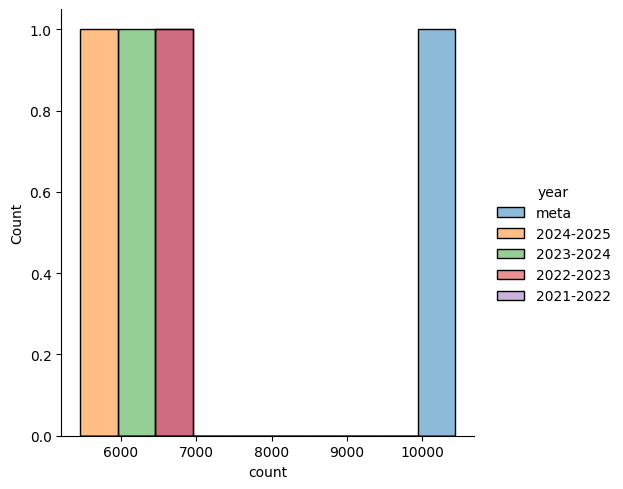

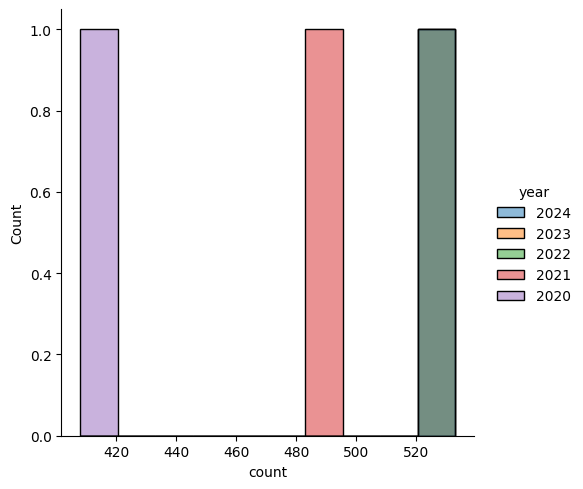

In [239]:
dico_count = {"count" : [], "year" : [], "season_class" : [] }
for column in player_stats_fbref.columns :
    dico_count["count"].append(player_stats_fbref[column].count()) 
    dico_count["year"].append(column)
    dico_count["season_class"].append("complete season" if "-" in str(column) or column=="meta" else "year")
df_count = pd.DataFrame(dico_count, index=player_stats_fbref.columns)
df_count.head()
sns.displot(data = df_count[df_count['season_class'] == "complete season"][:5], x="count",hue = "year", bins=10)
sns.displot(data = df_count[df_count['season_class'] == "year"][:5], x="count",hue = "year", bins=10)

J'essaie de voir pour les joueurs qui ont des données en "2024" si ils en ont aussi en "2023-2024" et/ou "2024-2025". C'est pour comprendre à quoi correspondent cette colonne qui n'est pas une saison. \n Il semblerait que cette colonne soit remplie pout des joueurs ayant été transférés à la mi-saison

In [177]:
print(len(player_stats_fbref))
print(player_stats_fbref["2024"].isnull().sum())
players_24_notnull = player_stats_fbref[player_stats_fbref['2024'].notnull()]
players_24_x_23_24_notnull = players_24_notnull[players_24_notnull['2023-2024'].notnull()]
players_24_x_24_25_notnull = players_24_notnull[players_24_notnull['2024-2025'].notnull()]
print(len(players_24_x_24_25_notnull))
print(players_24_x_24_25_notnull['2023-2024'].isnull().sum())

players_24_x_24_25_x_23_24_notnull = players_24_x_24_25_notnull[players_24_x_24_25_notnull['2023-2024'].notnull()]
valeurs_manquantes = sum([1 for v in players_24_x_24_25_x_23_24_notnull['2024-2025'][1].values() if v in [None, ""]])
valeurs_manquantes

10436
9903
51
39


106

In [178]:
players_24_notnull.describe()


,meta,2024-2025,2024,2023-2024,2023,2022-2023,2022,2021-2022,2021,2020-2021,...,1999-2000,1999,1998-1999,1998,1997-1998,1996-1997,1995-1996,1994-1995,1993-1994,1992-1993
count,533,51,533,133,355,234,272,307,202,338,...,1,0,0,0,0,0,0,0,0,0
unique,528,51,533,133,355,234,272,307,202,338,...,1,0,0,0,0,0,0,0,0,0
top,"{'height': '', 'weight': '', 'preferred foot':...","{'age': 26.0, 'team': 'Alavés', 'country': 'es...","{'age': 25.0, 'team': 'Godoy Cruz', 'country':...","{'age': 30.0, 'team': 'Athletic Club', 'countr...","{'age': 24.0, 'team': 'Godoy Cruz', 'country':...","{'age': 29.0, 'team': 'Athletic Club', 'countr...","{'age': 21.0, 'team': 'Fluminense', 'country':...","{'age': 28.0, 'team': 'Athletic Club', 'countr...","{'age': 22.0, 'team': 'Maldonado', 'country': ...","{'age': 27.0, 'team': 'Athletic Club', 'countr...",...,"{'age': 17.0, 'team': 'Bayern Munich', 'countr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,1,1,1,1,1,1,1,1,1,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On retire les colonnes du style "2024", "2023" qui ne contiennent aucunes informations

In [ ]:
n = len(player_stats_fbref)
for i in list(player_stats_fbref.columns) : 
    if "-" not in str(i) :
        player_stats_fbref = player_stats_fbref.drop(columns=i)
    elif player_stats_fbref[i].isnull().sum() == n :
        player_stats_fbref = player_stats_fbref.drop(columns=i)

player_stats_fbref.head()

,2024-2025,2023-2024,2022-2023,2021-2022,2020-2021,2019-2020,2018-2019,2017-2018,2016-2017,2015-2016,...,2001-2002,2000-2001,1999-2000,1998-1999,1997-1998,1996-1997,1995-1996,1994-1995,1993-1994,1992-1993
César Fernández,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yoel Lago,"{'age': 20.0, 'team': 'Celta Vigo', 'country':...","{'age': 19.0, 'team': 'Celta Vigo', 'country':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marc Vidal,"{'age': 24.0, 'team': 'Celta Vigo', 'country':...",NaN,"{'age': 22.0, 'team': 'FC Andorra', 'country':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rui Silva,"{'age': 30.0, 'team': 'Betis', 'country': 'es ...","{'age': 29.0, 'team': 'Betis', 'country': 'es ...","{'age': 28.0, 'team': 'Betis', 'country': 'es ...","{'age': 27.0, 'team': 'Betis', 'country': 'es ...","{'age': 26.0, 'team': 'Granada', 'country': 'e...","{'age': 25.0, 'team': 'Granada', 'country': 'e...","{'age': 24.0, 'team': 'Granada', 'country': 'e...","{'age': 23.0, 'team': 'Granada', 'country': 'e...","{'age': 22.0, 'team': 'Nacional', 'country': '...","{'age': 21.0, 'team': 'Nacional', 'country': '...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abde Ezzalzouli,"{'age': 22.0, 'team': 'Betis', 'country': 'es ...","{'age': 21.0, 'team': 'Betis', 'country': 'es ...","{'age': 20.0, 'team': 'Osasuna', 'country': 'e...","{'age': 19.0, 'team': 'Barcelona', 'country': ...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


b)Sofascore

In [15]:
sf_data = pd.read_csv("sf_data\player_ratings.csv")
sf_data.head()

,Unnamed: 0,2024-2025,2023-2024,2022-2023,2021-2022,2020-2021,2019-2020,2018-2019,2017-2018,2016-2017,2015-2016
0,Bukayo Saka,8.04,7.36,5.97,7.67,6.43,6.04,6.25,NaN,NaN,NaN
1,Neto,9.41,7.31,4.00,7.71,7.09,6.52,8.29,7.84,8.20,8.0
2,Declan Rice,8.63,7.98,5.95,8.14,6.30,7.03,7.95,7.26,NaN,NaN
3,Gabriel Magalhães,6.70,7.86,6.00,6.66,5.56,6.68,6.00,7.12,5.89,NaN
4,Martin Ødegaard,6.95,7.14,8.25,8.36,5.79,6.51,NaN,NaN,NaN,NaN


c) Transfer market

In [68]:
player_stats_tm=pd.read_csv('tm_data/player_stats_tm.csv')
player_stats_tm.index=player_stats_tm.loc[:,'Unnamed: 0']
player_stats_tm=player_stats_tm.drop('Unnamed: 0',axis=1)

transfer_history=pickle.load(open('tm_data/transfer_history.pkl','rb'))


In [69]:

player_stats_tm.loc["Bernardo Silva"]["market_values"]

"{'2013': 600.0, '2014': 2500.0, '2015': 15000.0, '2016': 20000.0, '2017': 40000.0, '2018': 65000.0, '2019': 100000.0, '2020': 70000.0, '2021': 75000.0, '2022': 80000.0, '2023': 80000.0, '2024': 70000.0}"

On observe que les valeurs marchandes sont stockées non pas dans un dictionnaire mais dans une chaîne de caractères. On rectifie cela en se servant de la fonction convertir_en_dictionnaire.

In [70]:
def convertir_en_dictionnaire(chaine):
    chaine = chaine.strip('{}').replace(' ', '')
    paires = chaine.split(',')
    
    dictionnaire = {}
    for paire in paires:
        if ':' in paire: 
            cle, valeur = paire.split(':')
            cle = cle[1:-1] #pour envoyer les guillemets en plus sur l'année
            dictionnaire[int(cle)] = float(valeur)
    return dictionnaire

player_stats_tm['market_values']=player_stats_tm["market_values"].apply(convertir_en_dictionnaire)
player_stats_tm.head()

,positions,market_values
Unnamed: 0,,
Bernardo Silva,"['Attacking Midfield', 'Right Winger', 'Centra...","{2013: 600.0, 2014: 2500.0, 2015: 15000.0, 201..."
Ederson,['Goalkeeper'],"{2013: 300.0, 2014: 900.0, 2015: 1200.0, 2016:..."
Erling Haaland,['Centre-Forward'],"{2016: 200.0, 2017: 300.0, 2018: 5000.0, 2019:..."
Jack Grealish,"['Left Winger', 'Attacking Midfield', 'Left Mi...","{2013: 250.0, 2014: 1000.0, 2015: 4500.0, 2016..."
John Stones,"['Centre-Back', 'Right-Back', 'Defensive Midfi...","{2011: 50.0, 2012: 100.0, 2013: 3500.0, 2014: ..."


On jette un coup d'oeil à l'organisation de l'historique des transferts. Les transferts sont rangés dans un dictionnaire par :  championnat, saison, club, départ/arrivée

In [99]:
transfer_history["GB1"][2024]['AFC Bournemouth']['departures']

[['Kieffer Moore', 'Sheffield United', 1790.0],
 ['Jamal Lowe', 'Sheffield Wednesday', 'free transfer'],
 ['Hamed Junior Traoré', 'AJ Auxerre', 'loan transfer'],
 ['Chris Mepham', 'Sunderland AFC', 'loan transfer'],
 ['Neto', 'Arsenal FC', 'loan transfer'],
 ['Daniel Jebbison', 'Watford FC', 'loan transfer'],
 ['Emiliano Marcondes', 'Without ClubWithout Club', '-'],
 ['Darren Randolph', None, '-'],
 ['Luis Sinisterra', 'Leeds United', 'End of loanJun 30, 2024'],
 ['Andrei Radu', 'Inter Milan', 'End of loanJun 30, 2024'],
 ['Lloyd Kelly', 'Newcastle Utd', 'free transfer'],
 ['Romain Faivre', 'Paderborn 07', 'loan transfer'],
 ['Joe Rothwell', 'Leeds United', 'loan transfer'],
 ['Ryan Fredericks', 'Athletic Club', '-'],
 ['Kepa Arrizabalaga', 'Chelsea', 'End of loanMay 31, 2025'],
 ['Gavin Kilkenny', 'Luton Town', '?'],
 ['Alex Palmer', 'Atalanta', 'loan transfer'],
 ['Dominic Solanke', 'Tottenham', 64300.0],
 ['Enes Ünal', 'Getafe', 'End of loanJun 30, 2024'],
 ['Jaidon Anthony', 'Burnl

Pour visualiser cet ensemble de données d'historique de transferts, on se propose de réaliser sur la carte on pourra voir les transfertsréalisés par les clubs de PL. 
On utilise pour cela la librairie Folium qui nous permettra de réaliser une carte interactive qui nous permettra de sélectionner les transferts que nous souhaitons afficher

In [ ]:
import folium
from IPython.display import display
from folium.plugins import AntPath

def get_transfer_value(club,season):
    if club in transfer_history["GB1"][season].keys():
        transfer_fees = {'departures' : [], 'arrivals' : []}
        transfer_fees['arrivals'] = [fee[2]/1000 for fee in transfer_history["GB1"][season][club]["arrivals"] if type(fee[2])==float or type(fee[2])==int]
        for fee in transfer_history["GB1"][season][club]["departures"] :
            if type(fee[2])==float or type(fee[2])==int :
                transfer_fees['departures'].append(fee[2]/1000)
        return transfer_fees
    return {'departures' : [0], 'arrivals' : [0]}

data = pd.read_csv("pl_clubs_latlon.csv")




# Sélectionner la saison ici
season = 2024


center_lat = data['latitude'].mean()
center_lon = data['longitude'].mean()

mymap = folium.Map(location=[center_lat, center_lon], zoom_start=6)
valeur = 4
for _, row in data.iterrows():
    club = row['club_name']
    transferts = get_transfer_value(club, season)
    valeur = round(sum(transferts['departures']) + sum(transferts['arrivals']))
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=4,  # Rayon pondéré par la valeur marchande
        popup=f"{club}: {valeur}M€ \n Départs: {round(sum(transferts['departures']))}M€ \n Arrivées : {round(sum(transferts['arrivals']))}M€",
        color="blue",
        fill=True,
        fill_color="cyan",
        fill_opacity=0.6,
    ).add_to(mymap)
    if club in transfer_history["GB1"][season].keys():
        liste_departs = transfer_history["GB1"][season][club]["departures"]
        liste_arrivees = transfer_history["GB1"][season][club]["arrivals"]
        club_layer = folium.FeatureGroup(name=f"{club}", show=False)


        
        for transfert in liste_departs:
            if transfert[1] in list(data['club_name']):
                # Départ et arrivée
                depart = (
                    float(data[data['club_name'] == club]['latitude']),
                    float(data[data['club_name'] == club]['longitude']),
                )
                arrivee = (
                    float(data[data['club_name'] == transfert[1]]['latitude']),
                    float(data[data['club_name'] == transfert[1]]['longitude']),
                )
                
                # Ajouter une flèche au layer
                path = AntPath(
                    locations=[depart, arrivee],  # Liste des coordonnées
                    color="red",
                    weight=5,
                    opacity=0.8,
                ).add_to(club_layer)
                path.add_child(folium.Popup(f"Joueur: {transfert[0]} \n {transfert[2]}"))
                club_layer.add_child(path)

        for transfert in liste_arrivees:
            if transfert[1] in list(data['club_name']):
                # Départ et arrivée
                arrivee = (
                    float(data[data['club_name'] == club]['latitude']),
                    float(data[data['club_name'] == club]['longitude']),
                )
                depart = (
                    float(data[data['club_name'] == transfert[1]]['latitude']),
                    float(data[data['club_name'] == transfert[1]]['longitude']),
                )
                
                # Ajouter une flèche au layer
                path = AntPath(
                    locations=[depart, arrivee],  # Liste des coordonnées
                    color="green",
                    weight=5,
                    opacity=0.8,
                ).add_to(club_layer)
                path.add_child(folium.Popup(f"Joueur: {transfert[0]} \n {transfert[2]}"))
                club_layer.add_child(path)

        # Ajouter la couche à la carte
    club_layer.add_to(mymap)    

folium.LayerControl(collapsed=True).add_to(mymap)



# Sauvegarder la carte et l'afficher
mymap.save("carte_interactive.html")
display(mymap)


C:\Users\massi\AppData\Local\Temp\ipykernel_24076\2449493347.py:49: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(data[data['club_name'] == club]['latitude']),
C:\Users\massi\AppData\Local\Temp\ipykernel_24076\2449493347.py:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(data[data['club_name'] == club]['longitude']),
C:\Users\massi\AppData\Local\Temp\ipykernel_24076\2449493347.py:53: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(data[data['club_name'] == transfert[1]]['latitude']),
C:\Users\massi\AppData\Local\Temp\ipykernel_24076\2449493347.py:54: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.il